#EXPERIMENT-3
##Application_Of_ML_lab_Bank

In [14]:
import pandas as pd
import numpy as np
import xgboost 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [15]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [16]:
bank.shape
round(100*(bank.isnull().sum()/len(bank.index)),2)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [17]:
bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [18]:
bank['default']=bank.default.map({'yes':1,'no':0})
bank['housing']=bank.housing.map({'yes':1,'no':0})
bank['loan']=bank.loan.map({'yes':1,'no':0})
bank['deposit']=bank.deposit.map({'yes':1,'no':0})

In [19]:
for col in ['job', 'marital','education','contact','month','poutcome']: bank = pd.concat([bank.drop(col,axis=1), pd.get_dummies(bank[col], prefix = col, prefix_sep= '_', drop_first= True, dummy_na=False)], axis=1)


In [20]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
bank.drop('contact_unknown', axis=1, inplace=True)
X= bank.drop('deposit', axis=1)
y= bank['deposit']
bank.drop('pdays', axis=1,inplace=True)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)


In [23]:
xgb = xgboost.XGBClassifier(n_estimate=100, learning_rate=0.08, gamma=0,subsample=0.75,colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)


XGBClassifier(learning_rate=0.08, max_depth=7, n_estimate=100, subsample=0.75)

In [24]:
y_train_preds= xgb.predict(X_train)
y_test_preds= xgb.predict(X_test)
print("XGB accuracy score for train: %.3f, test: %.3f" % (accuracy_score(y_train, y_train_preds), accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.907, test: 0.850


In [25]:
headers= ["name","score"]
values = sorted(zip(X_train.columns,xgb.feature_importances_),key = lambda x:x[1]*-1)
xgb_feature_importances = pd.DataFrame(values,columns = headers)


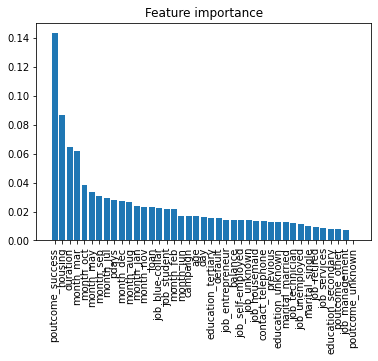

In [26]:
import matplotlib.pyplot as plt 

x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title("Feature importance")
plt.show()